In [16]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

from catboost import CatBoostRegressor

import pickle

In [17]:
df = pd.read_csv('../data/processed.csv')
df.head()

,author_type,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,living_meters,kitchen_meters,district,street,underground,price_per_square_meter
0,3,24,5,7,1,34.6,9000000,1978,18.000000,8.000000,143,38,332,260115
1,3,24,14,45,1,41.3,12800000,2026,20.000000,11.000000,105,887,168,309927
2,0,24,10,12,1,34.4,19372498,2026,11.800000,11.700000,124,1240,225,563154
3,3,24,4,33,1,42.9,23600000,2023,22.900000,15.000000,116,359,4,550116
4,4,24,1,16,1,37.7,9450000,1982,21.694836,6.619195,177,274,224,250663


In [18]:
# разделение на обучающую и тестовую выборки в процентном соотношении 75 к 25
train_size = int(len(df) * 0.75)
train, test = df.iloc[:train_size], df.iloc[train_size:]

X_train, y_train = train.drop(columns=['price_per_square_meter']), train['price_per_square_meter']
X_test, y_test = test.drop(columns=['price_per_square_meter']), test['price_per_square_meter']

In [19]:
# cоздание и обучение модели
model = CatBoostRegressor(iterations=5000, 
                          learning_rate=0.01, 
                          depth=1, 
                          loss_function='MAE',
                          has_time=True,
                          early_stopping_rounds=100)

model.fit(X_train, y_train)

# прогнозирование
predictions = model.predict(X_test)

0:	learn: 198494.7059554	total: 137ms	remaining: 11m 25s
1:	learn: 198083.0737058	total: 139ms	remaining: 5m 46s
2:	learn: 197677.7454520	total: 141ms	remaining: 3m 54s
3:	learn: 197279.7027804	total: 143ms	remaining: 2m 58s
4:	learn: 196888.4780068	total: 144ms	remaining: 2m 23s
5:	learn: 196027.0024805	total: 145ms	remaining: 2m
6:	learn: 195332.2522765	total: 146ms	remaining: 1m 44s
7:	learn: 194492.2029328	total: 147ms	remaining: 1m 31s
8:	learn: 194117.6225623	total: 148ms	remaining: 1m 21s
9:	learn: 193660.8611261	total: 149ms	remaining: 1m 14s
10:	learn: 192768.8840760	total: 150ms	remaining: 1m 7s
11:	learn: 192404.7557727	total: 151ms	remaining: 1m 2s
12:	learn: 192046.6731247	total: 152ms	remaining: 58.1s
13:	learn: 191695.5933747	total: 152ms	remaining: 54.3s
14:	learn: 190825.7210918	total: 153ms	remaining: 51s
15:	learn: 190223.7810864	total: 154ms	remaining: 48.1s
16:	learn: 189423.7448478	total: 155ms	remaining: 45.5s
17:	learn: 188863.2370330	total: 158ms	remaining: 43.

In [20]:
# оценка модели с помощью метрик
mape = mean_absolute_percentage_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f}")
print(f"MAE: {mae:.2f}")

R²: 0.8269
MAPE: 0.12
MAE: 69218.04


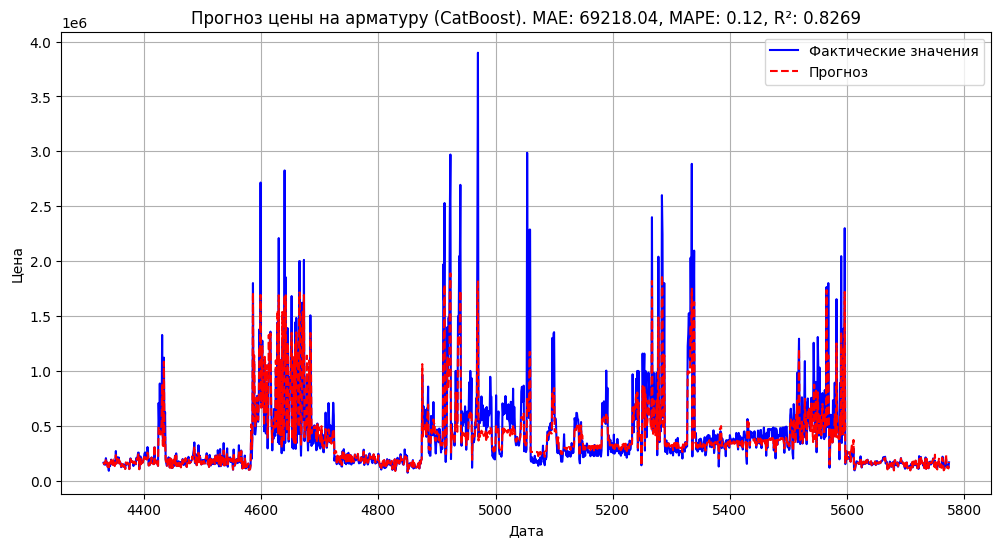

In [21]:
# визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(test.index, y_test, label='Фактические значения', color='blue')
plt.plot(test.index, predictions, label='Прогноз', color='red', linestyle='--')
plt.title(f'Прогноз цены на арматуру (CatBoost). MAE: {mae:.2f}, MAPE: {mape:.2f}, R²: {r2:.4f}')
plt.xlabel('Дата')
plt.ylabel('Цена')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
# результаты приемлемые, сохраняем модель
with open('../models/catboost_model.pkl', 'wb') as f:
    pickle.dump(model, f)